In [121]:
from nltk.corpus import stopwords
from collections import Counter
import string, logging, nltk, slate3k as slate

logging.propagate = False 
logging.getLogger().setLevel(logging.ERROR)

with open('PernodRicardReport2.pdf','rb') as f:
    extracted_text = slate.PDF(f)

In [123]:
#retrieve words from pdf pages
extractedWords = []
for i in range(len(extracted_text)):
    extractedWords += extracted_text[i].split()
extractedWords = [el.lower() for el in extractedWords]

#clean text from stopwords
stopWords = stopwords.words('english')
for symbol in ["-", ".", "", "pernod", "ricard", "&", "group", "directors", "registration", "group's", "universal", "document", "2018-2019", "(1)", "30", "0", "100", "1", "mr", "1.", "2019", "also", "l.", "new", "sa", "€", "share", "–", "•", "ing", "brands", ",", "4", "ion", "—"]:
    stopWords.append(symbol)
stopWords += list(string.ascii_lowercase)
cleanText = [word for word in extractedWords if word not in stopWords]

#find biggest occurences
most_occur = Counter(cleanText).most_common(10)
occurences = [most_occur[i][1] for i in range(len(most_occur))]
words = [most_occur[i][0] for i in range(len(most_occur))]

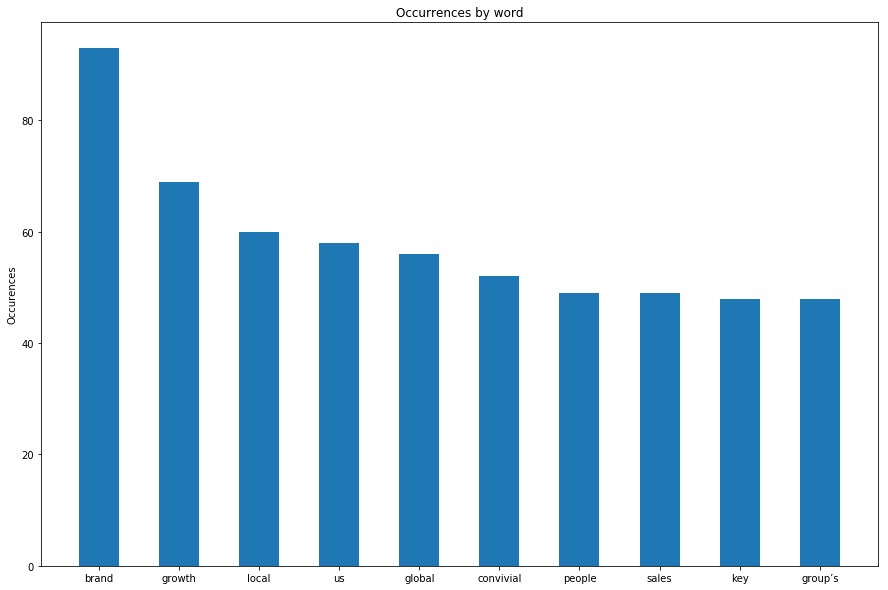

In [124]:
import matplotlib.pyplot as plt
import random

#choose monogram or bigram
bigram = [word for word in extractedWords if word not in stopWords]
monogram = cleanText
random.shuffle(monogram)

plt.figure(figsize = (15, 10))
plt.ylabel('Occurences')
plt.title('Occurrences by word')
plt.bar(words, occurences, width = 0.5)
plt.show()

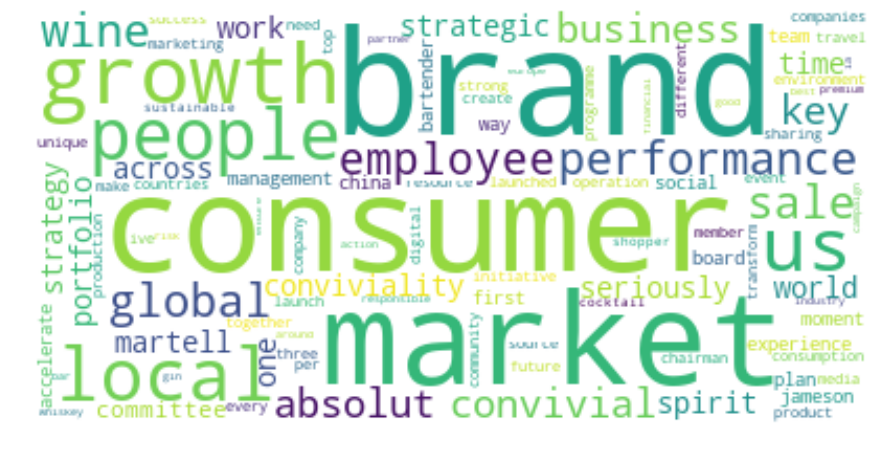

In [125]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

cleanTextString = " ".join(monogram)
addStop = ["number", "code", "set", "value", "condition", "million", "year", "years", "director", "fy19", "date", "annual", "based", "total", "period", "subject"]
wordcloud = WordCloud(max_font_size=70, background_color="white", max_words = 100, stopwords = stopWords + addStop).generate(cleanTextString)

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()